In [ ]:
from math import log
import time
import random
import matplotlib.pyplot as plt

In [ ]:
def power(a,n): 
  """
  This function calculates a**n recursively
  by recursively halving n using binary exponentiation. ( O(logn) )
  """
  if n == 1:
    return a
  return power(a,n//2)*power(a,n - n//2)

In [ ]:
def naive_power(a,n):
  if n == 1:
    return a
  return a*naive_power(a,n-1)

In [ ]:
a = time.time()
# naive_power(2,1000) #max recursion depth acheived for n = 1000. 
b = time.time()
d = power(2,10**7) #calculated 2 power 10 million in 3 seconds - 6 million digit number!!!
c = time.time()

print(f"naive_power() took {b - a}s\n power() took {c-b}s")
log(d)

naive_power() took 1.9550323486328125e-05s
 power() took 3.609816312789917s


6931471.805599453

In [ ]:
def power_mod(a,n, modval):
  """
  Instead of calculating a**n, and then taking modulus, 
  this function, takes modulus at every multiplication. 
  """
  if n == 1:
    return a 
  return ((power_mod(a,n//2,modval)%(modval))*(power_mod(a,n-n//2,modval)%(modval)) )% modval

In [ ]:
def rabin_miller_test(n): #assume n > 100
  """
  This fxn returns True if n is prime, else False.
  """
  if n == 1:
    return False
  if n == 2:
    return True
  L = []
  if n < 100:
    limit = n
  else: 
    limit = 100
  for x in range(limit):
    a = random.randint(2,n-1) # choosing random a 
    t = power_mod(a,n-1,n) # t = a^(n-1) % n
    L.append(t) # List of all values of t
    if t != 1: 
      return False # return False, if there is even one value of t != 1
    return True # else, if all 100 values are 1, return True

In [ ]:
a = time.time()
print(rabin_miller_test(9999991)) # 7 digit prime num
b = time.time()
print(b-a)

True
5.556613922119141


In [ ]:
a = time.time()
print(rabin_miller_test(28222149)) # 8 digit composite num
b = time.time()
print(b-a)

False
486.62593483924866


In [ ]:
a = time.time()
print(rabin_miller_test(42760088)) # 8 digit composite num
b = time.time()
print(b-a)

False
23.49644947052002


In [ ]:
a = time.time()
print(rabin_miller_test(99999989)) # 8 digit prime num
b = time.time()
print(b-a)

True
55.02992868423462


In [ ]:
a = time.time()
print(rabin_miller_test(123484321)) # 9 digit prime num
b = time.time()
print(b-a)

True
68.40167498588562


In [ ]:
a = time.time()
print(rabin_miller_test(341565143)) # 9 digit prime num
b = time.time()
print(b-a)

True
188.86794114112854


In [ ]:
def primediffs(n):
  """
  This function calculates difference between consecutive prime numbers.
  Output is dictionary, where keys are differces and values are number of prime numbers with that difference
  """
  # will run for all integeres upto n (including n)
  d = {}
  prev = 2
  for x in range(3,n+1):
    if rabin_miller_test(x): 
      curr = x
      diff = curr - prev
      if diff in d.keys():
        d[diff] += 1
      else:
        d[diff] = 1
    prev = curr
  return d


In [ ]:
data = primediffs(10000)
data

{1: 4,
 2: 232,
 3: 1,
 4: 215,
 5: 2,
 6: 312,
 8: 101,
 10: 115,
 12: 113,
 14: 49,
 16: 33,
 18: 36,
 20: 16,
 22: 16,
 24: 13,
 26: 2,
 28: 5,
 30: 9,
 32: 1,
 34: 2,
 36: 1}

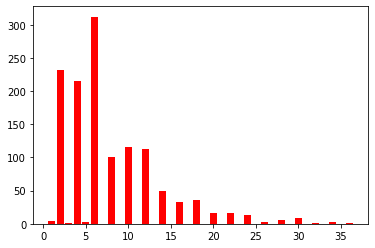

In [ ]:
plt.bar(list(data.keys()), data.values(), color='r')
plt.show()